In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as k
from keras.callbacks import ModelCheckpoint 

source = pd.read_csv('cardio_dataset.csv').values
data = source[:,:7]
target = np.reshape(source[:,7],(-1,1))
#print(target)

#data preprocessing
scaler_data = MinMaxScaler()
scaler_data.fit(data)

scaler_target = MinMaxScaler()
scaler_target.fit(target)

scaled_data = scaler_data.transform(data)
scaled_target = scaler_target.transform(target)

#model architecture define function
def model_architecture(data,target):
    model = Sequential()

    model.add(Dense(128, input_dim = 7, activation = 'relu'))
    model.add(Dropout(0.5)) 
    model.add(Dense(64, activation = 'tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation = 'tanh'))
    model.add(Dense(1, activation = 'linear'))

    return model   

 

#R2 score define function
def r2_score(y_true, y_pred):

    ss_res = k.sum(k.square(y_true - y_pred))
    ss_total = k.sum(k.square(y_true - k.mean(y_true)))

    return 1 - ss_res / (ss_total + k.epsilon())




#call model
model = model_architecture(scaled_data,scaled_target)


#compile model
model.compile(loss = 'mean_squared_error', optimizer = 'adam' , metrics = ['mae',r2_score]) 
#model.summary()

#split scaled data
train_data,test_data,train_target,test_target = train_test_split(scaled_data, scaled_target, test_size = 0.2)

# Set up model checkpoint
checkpoint = ModelCheckpoint('models/best_model.keras',monitor='val_loss',save_best_only=True,mode='min',verbose=1)

#train model
history = model.fit(train_data, train_target , epochs = 250, validation_data = (test_data, test_target), callbacks=[checkpoint] )

#save model
model.save("models/final_model.keras")




c:\Users\Pasindu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0817 - mae: 0.2098 - r2_score: -3.4752
Epoch 1: val_loss improved from inf to 0.00826, saving model to models/best_model.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0814 - mae: 0.2094 - r2_score: -3.4622 - val_loss: 0.0083 - val_mae: 0.0620 - val_r2_score: 0.6489
Epoch 2/250
154/167 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0123 - mae: 0.0807 - r2_score: 0.4122
Epoch 2: val_loss improved from 0.00826 to 0.00701, saving model to models/best_model.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0122 - mae: 0.0804 - r2_score: 0.4164 - val_loss: 0.0070 - val_mae: 0.0564 - val_r2_score: 0.7017
Epoch 3/250
155/167 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089 - mae: 0.0671 - r2_score: 0.5391
Epoch 3: val_loss improved from 0.00701 to 0.00636, saving model to models/best_model.keras
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0089 - mae: 0.0671 - r2_score: 0.5407 - val_loss: 0.0064 - val_mae: 0.0560

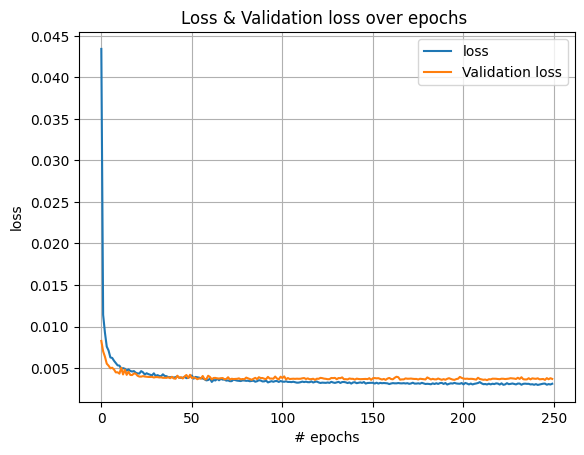

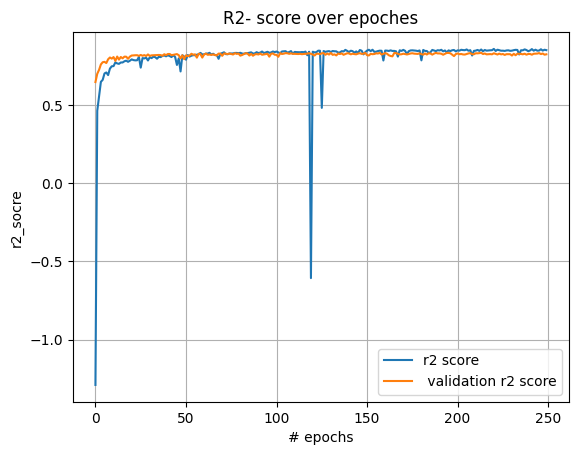

In [10]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'], label = 'loss')
plt.plot(model.history.history['val_loss'], label = 'Validation loss')
plt.legend()
plt.title('Loss & Validation loss over epochs ')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.grid(True)
plt.show()

plt.plot(model.history.history['r2_score'], label = 'r2 score')
plt.plot(model.history.history['val_r2_score'], label = ' validation r2 score')
plt.legend()
plt.title('R2- score over epoches')
plt.xlabel('# epochs')
plt.ylabel('r2_socre')
plt.grid(True)
plt.show()


In [12]:

#for transform and inverse transform data
import joblib

joblib.dump(scaler_data, 'models/scaler_data.sav')
joblib.dump(scaler_target, 'models/scaler_target.sav')


['models/scaler_target.sav']